<a href="https://colab.research.google.com/github/ratmcu/wikipiifed/blob/master/wikipii_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wget
import os
import wget
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
try:
    import colabimport
except:
    colabimporturl = 'https://github.com/ratmcu/colaboratory_import/raw/master/colabimport.py'
    filename = colabimporturl.split("/")[-1].split("?")[0]
    if os.path.isfile(filename):
        os.remove(filename)
    wget.download(colabimporturl)
    import colabimport
    
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/conll_tagged_ne.ipynb?raw=true')
from conll_tagged_ne import WikiConLLTagger
class HashableTupleAnnotations(tuple):
    def __hash__(self):
        return hash(tuple(sorted([self[0:1],self[1:2]])))
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
import re
!pip install pyahocorasick
!pip install fuzzyset
from ahocorasick import Automaton
import fuzzyset
from operator import itemgetter, attrgetter
import pandas as pd
import pickle
import urllib
from bs4 import BeautifulSoup
import numpy as np
import json

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=31ed7dcd7486daa28932d99d4834ff0fcd660f71dbd583a1cd84127128b05bcb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
importing Jupyter notebook from conll_tagged_ne.ipynb
importing Jupyter notebook from reusable_annotator.ipynb
     |████████████████████████████████| 317kB 2.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81708 sha256=8ab72943c2711b68dcea1d384b515f3709f58c664f2a4706fdc3b1f54466b204
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 378kB 2.7MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
  Created wheel for fuzzyset: filename=fuzzyset-0.0.19-cp36-cp36m-linux_x86_64.whl size=165727 sha256=02f2cd6b71c9c982fe47bfb7a6d7bea86

## Collecting page links 

In [0]:
quote_page = 'https://en.wikipedia.org/w/index.php?title=Category:Living_people'
page = urllib.request.urlopen(quote_page)
soup = BeautifulSoup(page, 'html.parser')
links = []
i = 0
while i  < 10:
    content_big = soup.find('div', attrs={'class': 'mw-content-ltr'}) # or infobox biography vcard
    link_list = content_big.find('div', attrs={'class': 'mw-category'}) # or infobox biography vcard
    links.extend(link_list.find_all('a'))
    print(len(links))
    next_page = None
    for j, aa in enumerate(soup.find_all('a')):
        if aa.text == 'next page':
            next_page = aa.get('href')
            if j%100 == 0:
                print(aa.get('href')[:10])
            page = urllib.request.urlopen('https://en.wikipedia.org' + next_page)
            soup = BeautifulSoup(page, 'html.parser')
            break
    if next_page == None:
        break
    i = i + 1
 
links

200
400
600
800
1000
1200
1400
1600
1800
2000


[<a href="/wiki/1.8.7" title="1.8.7">1.8.7</a>,
 <a href="/wiki/1.Cuz" title="1.Cuz">1.Cuz</a>,
 <a href="/wiki/2_Chainz" title="2 Chainz">2 Chainz</a>,
 <a href="/wiki/2_Cold_Scorpio" title="2 Cold Scorpio">2 Cold Scorpio</a>,
 <a href="/wiki/2_Pistols" title="2 Pistols">2 Pistols</a>,
 <a href="/wiki/2_Tuff_Tony" title="2 Tuff Tony">2 Tuff Tony</a>,
 <a href="/wiki/2Baba" title="2Baba">2Baba</a>,
 <a href="/wiki/2C_(musician)" title="2C (musician)">2C (musician)</a>,
 <a href="/wiki/Mr_2Kay" title="Mr 2Kay">Mr 2Kay</a>,
 <a href="/wiki/2Mex" title="2Mex">2Mex</a>,
 <a href="/wiki/2oolman" title="2oolman">2oolman</a>,
 <a href="/wiki/2Play" title="2Play">2Play</a>,
 <a href="/wiki/2Rude" title="2Rude">2Rude</a>,
 <a href="/wiki/2Shotz" title="2Shotz">2Shotz</a>,
 <a href="/wiki/2ulz" title="2ulz">2ulz</a>,
 <a href="/wiki/2wenty" title="2wenty">2wenty</a>,
 <a href="/wiki/3D_Na%27Tee" title="3D Na'Tee">3D Na'Tee</a>,
 <a href="/wiki/3LAU" title="3LAU">3LAU</a>,
 <a href="/wiki/4mat" t

# Mass Dataset 

In [0]:
import multiprocessing
import os
import time
# split a list into evenly sized chunks
!pip install wget
import wget
import logging
import pickle
import ast
import pandas as pd
import numpy as np
import urllib
from bs4 import BeautifulSoup
import traceback
import re

try:
    import colabimport
except:
    colabimporturl = 'https://github.com/ratmcu/colaboratory_import/raw/master/colabimport.py'
    filename = colabimporturl.split("/")[-1].split("?")[0]
    if os.path.isfile(filename):
        os.remove(filename)
    wget.download(colabimporturl)
    import colabimport
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/reusable_annotator.ipynb?raw=true')
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/info_box.ipynb?raw=true')
# import io, os, sys, types
from reusable_annotator import PageContents
from info_box import InfoCard, PrivateEntities
# exit()
if not os.path.isfile('./Living_people.pkl'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/Living_people.pkl?raw=true')

logdir = 'data_frames'
if not os.path.exists(logdir): os.makedirs(logdir)
random_test_params = { 'test':True, 'samples': 40}

# Scoring pages and choosing the best ones


## selecting the row names to be scored

In [0]:
#filter the row entry
def rowEntryFilter(lst):
    entries = set()
#     reg = re.compile('[0-9]+$', re.MULTILINE)
#     reg = re.compile('')
#     reg = re.compile('[0-9*]')
    for entry in lst:
#         match = reg.match(entry)
        if any(d in entry for d in'0123456789'): # remove the clutter a bit by removing rows with digits
            # print(entry)
            continue  
        entries.add(entry)
    return entries

In [0]:
import tarfile
if not os.path.exists('900k_living_people_ner_presence.tar.gz'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/900k_living_people_ner_presence.tar.gz?raw=true')
tar = tarfile.open('900k_living_people_ner_presence.tar.gz', mode='r')
tar.extractall('./900k_living_people_ner_presence')
tar.close()

In [0]:
paths = sorted([os.path.join(f[0], name) for f in os.walk('./900k_living_people_ner_presence') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))
paths = paths[:8201]
# int(paths[0].split('_')[-1].split('.')[0])
# presence_frames_raw =  pd.DataFrame()
entity_rows = set()
for path in paths:
#     df = pd.read_csv(path).fillna(0)
    df = pd.read_csv(path)
    entity_rows.update(df.columns.tolist())
#     presence_frames_raw = presence_frames_raw.append(df,ignore_index = True)
# presence_frames_raw = presence_frames_raw.fillna(0)
# 'Home\xa0town' in set(presence_frames_raw.columns.tolist())

In [0]:
ss = rowEntryFilter(entity_rows)
with open('entity_rows.pkl', 'wb') as f:
    pickle.dump(ss, f)

In [0]:
if not os.path.exists('entity_rows.pkl'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/entity_rows.pkl?raw=true')
with open('entity_rows.pkl', 'rb') as f:
    ss = pickle.load(f)
fltrd = rowEntryFilter(ss)
with open('entity_rows.txt', 'w') as f:
    for entry in fltrd:
        f.writelines(entry+'\n')

In [0]:
#if the rows mentioned in the following text following exists in a link score of one is given to each presence
if not os.path.exists('selected_entity_rows.txt'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/selected_entity_rows.txt?raw=true')
selected_entity_rows = open('selected_entity_rows.txt', 'r').read().splitlines()
selected_entity_rows = set(selected_entity_rows)
selected_entity_rows.add('Alma\xa0mater')
selected_entity_rows
# chosen_entity_rows = {'Alma mater', 'Alma\xa0mater', 'Born', 'Born:', 
#                 'College', 'Education','Parent(s)', 'Parents',
#                 'High school', 'High school:', 'Spouse(s)',
#                 'Place of birth', }


{'Alma mater',
 'Alma\\xa0mater',
 'Almat mater',
 'Alma\xa0mater',
 'Birth name',
 'Born',
 'Born:',
 'Children',
 'College',
 'College(s)',
 'Colleges',
 'Date of birth',
 'Education',
 'Father',
 'Father’s name',
 'Full name',
 'High school',
 'High school:',
 'Home town',
 'Law School',
 'Mother',
 'Mother’s name',
 'Name',
 'Name(s)',
 'Parent',
 'Parent(s)',
 'Parents',
 'Place of birth',
 'School',
 'Schools',
 'Spouse',
 'Spouse(s)',
 'Spouses'}

## Scoring pages

In [0]:
def scorePages(page_summary):
    '''Give a score to each entry by the columns with the ones'''
    score_list = []
#     selected_entity_rows = {'Alma mater', 'Alma\xa0mater', 'Born', 'Born:', 
#                 'College', 'Education','Parent(s)', 'Parents',
#                 'High school', 'High school:', 'Spouse(s)',
#                 'Place of birth'}
    
    for idx, row in enumerate(page_summary.iterrows()):
        frame = row[1]
        score = 0
        for key in frame.keys():
            if key in {'link'}:
                continue
#             print(frame[key],key)
            elif key in selected_entity_rows:
                score = score + frame[key]
# #         score_df = score_df.append(pd.DataFrame({'index': [idx], 'score':score, 'NAME': name }))
# #         score_df = score_df.append(pd.DataFrame({'INDEX': [idx], 'SCORE':score }))    
        score_list.append(score)
    return pd.DataFrame({'SCORE': score_list })

# paths = paths[:101]
paths = paths[:8201]
presence_score_df =  pd.DataFrame()
for path in paths:
    df = pd.read_csv(path).fillna(0).iloc[:,1:]
#     print(df['link'])
    df = pd.DataFrame({'LINK': df['link'] }).assign(SCORE=scorePages(df))
    presence_score_df = presence_score_df.append(df, ignore_index = True)
presence_score_df = presence_score_df.sort_values(by='SCORE', ascending = False)
# presence_frames.to_csv('presence_frames.csv')
# presence_frames.drop_duplicates(subset='link')
# from inspect import currentframe, getsourcelines, getframeinfo
# frameinfo  = getframeinfo(currentframe())
# framelines = getsourcelines(currentframe())
# ll = [print(line[:-1]) for line in framelines[0]]

In [0]:
presence_score_df.to_csv('entity_presence_score.csv')

## Analysis of the Entity presence inside the info box

In [0]:
if not os.path.exists('entity_presence_score.csv'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/entity_presence_score.csv?raw=true')

entity_presence_score_df = pd.read_csv('entity_presence_score.csv')
# sanity_check_samples_1 = entity_presence_score_df.sample(n=10)
# print(sanity_check_samples_1.iloc[:,0].iloc[0], sanity_check_samples_1.iloc[:,1].iloc[0])
# print(sanity_check_samples_1.iloc[0]['LINK'], sanity_check_samples_1.iloc[0][0])
# sanity_check_samples_2 = pd.read_csv(paths[sanity_check_samples_1.iloc[0][0]//100])
# print(sanity_check_samples_2.iloc[sanity_check_samples_1.iloc[0][0]%100]['link'])

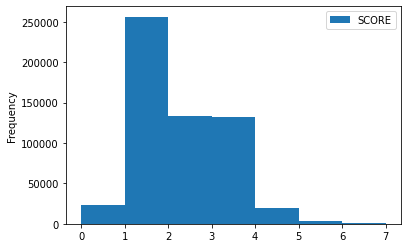

In [0]:
import matplotlib.pyplot as plt
entity_presence_score_df.iloc[:,1:].plot.hist(by='SCORE',bins=7)
histogram_df = entity_presence_score_df.iloc[:,1:].groupby('SCORE')
# entity_presence_score_df.plot.hist(by='SCORE',bins = max(entity_presence_score_df['SCORE']), alpha=0.5)

In [0]:
# histogram_df.groupby('SCORE').count()
histogram_df=entity_presence_score_df.iloc[:,1:].groupby('SCORE').count()
histogram_df

,LINK
SCORE,
0.0,23513
1.0,256418
2.0,134091
3.0,132703
4.0,19723
5.0,2978
6.0,406
7.0,17


## Testing entity extraction from the pages with 7 relavant rows in the info box

In [0]:
logger.setLevel(logging.INFO)
indices = entity_presence_score_df.iloc[:,1:].groupby('SCORE').groups[7.0]
for index in indices:
    url = 'http://en.wikipedia.org'+entity_presence_score_df.iloc[index]['LINK']
    try:
        urllib.request.urlopen(url, timeout = 5)
    except:
        raise Exception('page not found!!!!!!!!!')
    pg = PageContents(url)
    
    if not pg.table:
        raise Exception('unable to find a info table in the page')
# pg = PageContents('https://en.wikipedia.org/wiki/Donald_Trump')
    else:
        print(url)
        info_card = InfoCard(pg)
        print(info_card.info_table)
        print(PrivateEntities(info_card).entity_dict)

http://en.wikipedia.org/wiki/Carl_Roberts_(diplomat)
info card is scraped successfully
{'Preceded by': ['Ronald Michael Sanders'], 'Succeeded by': ['Althea Allison Vanderpoole Banahene'], 'Born': ['', '1948-10-13', ')', 'October 13, 1948', '', "St. John's, Antigua and Barbuda"], 'Spouse(s)': ['m 1974, Pauline Margaret A.'], 'Children': ['two sons one daughter, Chalene to Brian Gagalager)'], 'Mother': ['Audrey E. Roberts'], 'Father': ['Arthur E. S. Roberts'], 'Education': ['Antigua Grammar School'], 'Alma mater': ['', '1982:', 'Bachelor of Engineering', 'Hons magna cum laude of the', 'Northeastern University', 'Boston', '', '1995', 'Master of Business Administration', 'of the', 'University of the West Indies', ',', 'Barbados', '.', '', '2004:', 'Doctor of Business Administration', 'of the', 'University of Bradford', '.', '']}
{'NAME': [{'dict_key': 'Born', 'type': 'PERSON', 'entity_list': ["St. John's"]}], 'BIRTH_DATE': [{'dict_key': 'Born', 'type': 'DATE', 'entity_list': ['1948-10-13',

In [0]:
import random
# data = random.choices(links_js, k=random_test_params['samples'])
indices_list = entity_presence_score_df.iloc[:,1:].groupby('SCORE').groups[6.0]

indices_list = random.choices(indices_list, k=10)
for index in indices_list:
    url = 'http://en.wikipedia.org'+entity_presence_score_df.iloc[index]['LINK']
    try:
        urllib.request.urlopen(url, timeout = 5)
    except:
        raise Exception('page not found!!!!!!!!!')
    pg = PageContents(url)
    
    if not pg.table:
        raise Exception('unable to find a info table in the page')
# pg = PageContents('https://en.wikipedia.org/wiki/Donald_Trump')
    else:
        print(url)
        info_card = InfoCard(pg)
        print(info_card.info_table)
        print(PrivateEntities(info_card).entity_dict)

http://en.wikipedia.org/wiki/Seumas_Milne
info card is scraped successfully
{'Leader': ['Jeremy Corbyn'], 'Preceded by': ['Bob Roberts'], 'Succeeded by': ['Ben Nunn'], 'Born': ['1958', 'Dover', ',', 'Kent', ', England'], 'Nationality': ['British'], 'Political party': ['Labour'], 'Spouse(s)': ['Cristina Montanari', 'm.', '1992)'], 'Relations': ['Kirsty Milne', ''], 'Children': ['2'], 'Parents': ['Alasdair Milne', ''], 'Education': ['Winchester College'], 'Alma mater': ['Balliol College, Oxford', 'Birkbeck, University of London'], 'Occupation': ['Political aide, journalist and writer']}
{'NAME': [{'dict_key': 'Born', 'type': 'PERSON', 'entity_list': ['Kent']}], 'BIRTH_DATE': [{'dict_key': 'Born', 'type': 'DATE', 'entity_list': ['1958']}], 'BIRTH_PLACE': [{'dict_key': 'Born', 'type': 'GPE', 'entity_list': ['Kent', 'Dover']}], 'CHILDREN': [{'dict_key': 'Children', 'type': 'PERSON', 'entity_list': []}], 'SPOUSES': [{'dict_key': 'Spouse(s)', 'type': 'PERSON', 'entity_list': ['Cristina Montan

In [0]:
import os
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/conll_tagged_ne.ipynb?raw=true')
from conll_tagged_ne import WikiConLLTagger

# Dataset creation

In [0]:
import os
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
!pip install wget
import wget
try:
    import colabimport
except:
    colabimporturl = 'https://github.com/ratmcu/colaboratory_import/raw/master/colabimport.py'
    filename = colabimporturl.split("/")[-1].split("?")[0]
    if os.path.isfile(filename):
        os.remove(filename)
    wget.download(colabimporturl)
    import colabimport
# import importlib 
# importlib.reload(conll_tagged_ne) 
# from conll_tagged_ne import WikiConLLTagger    
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/conll_tagged_ne.ipynb?raw=true')
from conll_tagged_ne import WikiConLLTagger
import pandas as pd
import urllib
import multiprocessing
import time
# split a list into evenly sized chunks
#!pip install wget
import wget
import pickle
import ast
import numpy as np
from bs4 import BeautifulSoup
import traceback

## creating annotated files from urls

parallely scrape pages and annotate and store them, shown here is a sample of the process for few random entries

In [0]:
csv_url = 'https://github.com/ratmcu/wiki_ner/blob/master/entity_presence_score.csv?raw=true'
csv_filename = csv_url.split("/")[-1].split("?")[0]
if os.path.isfile(csv_filename):
        os.remove(csv_filename)
wget.download(csv_url)
entity_presence_score_df = pd.read_csv(csv_filename)

# import matplotlib.pyplot as plt
# entity_presence_score_df.iloc[:,1:].plot.hist(by='SCORE',bins=7)
# histogram_df = entity_presence_score_df.iloc[:,1:].groupby('SCORE')

indices_list = []
indices_list.extend(entity_presence_score_df.iloc[:,1:].groupby('SCORE').groups[4.0])
indices_list.extend(entity_presence_score_df.iloc[:,1:].groupby('SCORE').groups[5.0])
indices_list.extend(entity_presence_score_df.iloc[:,1:].groupby('SCORE').groups[6.0])
indices_list.extend(entity_presence_score_df.iloc[:,1:].groupby('SCORE').groups[7.0])
print(indices_list)
data = []
for index in indices_list:
    data.append((index, 'http://en.wikipedia.org' +entity_presence_score_df.iloc[index]['LINK']))
# print(data)
# exit(0)
save_dir = 'scrapes'
if not os.path.exists(save_dir): os.makedirs(save_dir)

def get_annotations(url):
    try:
#     from conll_tagged_ne import WikiConLLTagger
        tagger = WikiConLLTagger(url[1])
        df = pd.DataFrame(data = tagger.place_tags()).copy()
        summary_dict = {'URL':url[1]}
        summary = tagger.tag_factory.get_tag_summary()
        [ summary_dict.update({key:list([summary[key]])}) for key in summary.keys()]
        summary_df = pd.DataFrame(data = summary_dict)
        print(summary_df)
        return url[0], df, summary_df, url[1].split('/')[-1]
#     return url[0], pd.DataFrame(), pd.DataFrame(), url[1].split('/')[-1]

    except Exception as e:
        print(traceback.format_exc())
        print("failed to annotate the page!")
        print(url)    

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

def do_job(in_queue, queue):
    import logging
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    while True:
        if in_queue.empty(): return
        url_list = in_queue.get()
        for url in url_list:
            queue.put(get_annotations(url))
        
def save_chunk_to_disk(saver_queue, event):
    while True:
            try:
                index, annot_df, summary_df, name = saver_queue.get(block=True, timeout=1)
                if not os.path.exists(save_dir + '/' + name): os.makedirs(save_dir + '/' + name)
                annot_df.to_csv(save_dir + '/' + name + '/' + 'annot_csv_{0}.csv'.format(index))    
                print('saved file: annot_csv_{0}.csv'.format(index))
                summary_df.to_csv(save_dir + '/' + name + '/' + 'summary_df_{0}.csv'.format(index))    
                print('saved file: summary_df_{0}.csv'.format(index))
#             except Exception as e:
#                 print(traceback.format_exc())
            except:
                pass
            if event.is_set(): break
    print('done saving files to the disk')
             
def dispatch_jobs(data, worker_number):
    category_data_frame =  pd.DataFrame()
    total = len(data)
    chunk_size = 100 #total // job_number
    #chunk_size = total // worker_number
    slice = chunks(data, chunk_size)

    saver_queue = multiprocessing.Queue(1000)
    event = multiprocessing.Event()
    disk_save_mp = multiprocessing.Process(target=save_chunk_to_disk, args=(saver_queue, event))
    workers = []
    in_queues = []
    
    print('queued data')    
    in_queue = multiprocessing.Queue(10000)
    for worker in range(worker_number):
        j = multiprocessing.Process(target=do_job, args=(in_queue, saver_queue))
        workers.append(j)
    
    queue_number = 0
    
    for i, s in enumerate(slice):
        in_queue.put(s)
        
    print('workers created')    
    
    for worker in workers:
        time.sleep(1)
        worker.start()
    disk_save_mp.start()    
    print('workers started')
    queue_empty = False
    running = any(p.is_alive() for p in workers)
    while running:
        #save_chunk_to_disk(saver_queue.get(block=True))
        running = any(p.is_alive() for p in workers)
    print('all in queues drained')
    while not saver_queue.empty(): pass    
    event.set()
    disk_save_mp.join()  
    return

import random
data_r = random.choices(data, k=1000)
start_time = time.perf_counter()
print(os.cpu_count())
cpu_count = os.cpu_count()
dispatch_jobs(data_r, cpu_count)
end_time = time.perf_counter()      # 2
run_time = end_time - start_time 
print(run_time)
import tarfile
tar =  tarfile.open('dataset.tar.gz', mode='w:gz')
tar.add('scrapes')
tar.close()


Streaming output truncated to the last 5000 lines.
saved file: annot_csv_3669.csv
saved file: summary_df_3669.csv
                                        URL  BD  NBD  CH  ...  NGPE  ED  NORG  SENTS
0  http://en.wikipedia.org/wiki/Jason_Chang   0    4   0  ...     2   0     6      5

[1 rows x 12 columns]
saved file: annot_csv_3475.csv
saved file: summary_df_3475.csv
info card is scraped successfully
info card is scraped successfully
                                            URL  BD  NBD  ...  ED  NORG  SENTS
0  http://en.wikipedia.org/wiki/Ajay_Chandrakar   1   12  ...   1    25     46

[1 rows x 12 columns]
saved file: annot_csv_3775.csv
saved file: summary_df_3775.csv
                                            URL  BD  NBD  ...  ED  NORG  SENTS
0  http://en.wikipedia.org/wiki/Paul_Churchland   2   13  ...   3    24     41

[1 rows x 12 columns]
saved file: annot_csv_3573.csv
saved file: summary_df_3573.csv
info card is scraped successfully
                                        

## creating text file dataset from csv files

In [0]:
import tarfile
tar =  tarfile.open('dataset.tar.gz', mode='r:gz')
tar.extractall('./dataset')
tar.close()

In [0]:
import os
paths_summary = sorted([os.path.join(f[0], name) for f in os.walk('./dataset') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv' and name.split('_')[0]=='summary'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))

paths_annot = sorted([os.path.join(f[0], name) for f in os.walk('./dataset') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv' and name.split('_')[0]=='annot'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))

In [0]:
len(paths_annot), len(paths_summary)

(985, 985)

In [0]:
import pandas as pd
summary_df = pd.DataFrame()
import random
paths = random.choices(paths_summary, k=100)
# for path in paths:
for path in paths_summary[:10]:
    df = pd.read_csv(path).iloc[:,1:]
#     if df.iloc[:,1:]['BP'][0]!=0:
#         summary_df = summary_df.append(df, ignore_index = True)
    summary_df = summary_df.append(df, ignore_index = True)
print(summary_df['URL'])
summary_df.iloc[:,1:]

0           http://en.wikipedia.org/wiki/Cynthia_Hogan
1      http://en.wikipedia.org/wiki/Arvind_Singh_Mewar
2              http://en.wikipedia.org/wiki/Pete_Olson
3            http://en.wikipedia.org/wiki/Gene_Hackman
4    http://en.wikipedia.org/wiki/Prince_Faisal_bin...
5           http://en.wikipedia.org/wiki/Terri_Runnels
6           http://en.wikipedia.org/wiki/Paul_Sarbanes
7         http://en.wikipedia.org/wiki/Chang_Hsiao-yen
8         http://en.wikipedia.org/wiki/Catherine_Clark
9           http://en.wikipedia.org/wiki/Peter_Douglas
Name: URL, dtype: object


,BD,NBD,CH,PR,SP,NPE,BP,NGPE,ED,NORG,SENTS
0,2,3,0,0,0,8,0,6,2,14,11
1,0,7,3,1,4,19,0,30,0,0,38
2,1,52,0,0,1,78,0,44,2,103,94
3,1,94,0,0,2,97,0,30,3,37,105
4,1,23,0,2,11,31,0,16,0,0,35
5,1,44,0,0,6,64,0,18,0,0,91
6,1,40,3,0,2,22,0,32,5,29,37
7,1,8,0,0,0,16,0,6,0,0,13
8,0,0,0,2,1,10,0,4,0,0,14
9,1,10,0,2,1,17,0,3,0,0,16


In [0]:
import pandas as pd
summary_df = pd.DataFrame()
import random
paths = random.choices(paths_summary, k=100)
# for path in paths:
for path in paths_summary:
    df = pd.read_csv(path).iloc[:,1:]
#     if df.iloc[:,1:]['BP'][0]!=0:
    summary_df = summary_df.append(df, ignore_index = True)
#     summary_df = summary_df.append(df, ignore_index = True)
# print(summary_df['URL'])
summary_df.iloc[:,1:].sum()

BD         762
NBD      26016
CH         490
PR         237
SP        1498
NPE      32602
BP           0
NGPE     15557
ED        1193
NORG     25581
SENTS    44831
dtype: int64

## splitting the dataset to the test/valid/train

In [0]:
scored_summary = summary_df.assign(SCORE = summary_df[['BD','CH', 'PR', 'SP','BP', 'ED']].apply(lambda x: x>0, axis=1, result_type='broadcast').sum(axis=1))
scored_summary.to_csv('scored_summary.csv')

In [0]:
scored_summary_sorted = scored_summary.sort_values(by='SCORE', ascending = False)
scored_summary_sorted.groupby('SCORE').count()

,URL,BD,NBD,CH,PR,SP,NPE,BP,NGPE,ED,NORG,SENTS
SCORE,,,,,,,,,,,,
0,98,98,98,98,98,98,98,98,98,98,98,98
1,180,180,180,180,180,180,180,180,180,180,180,180
2,279,279,279,279,279,279,279,279,279,279,279,279
3,349,349,349,349,349,349,349,349,349,349,349,349
4,77,77,77,77,77,77,77,77,77,77,77,77
5,2,2,2,2,2,2,2,2,2,2,2,2


score of 5 as test\
score of 4 as eval

In [0]:
scored_summary_sorted.groupby('SCORE').groups[5.0]

Int64Index([340, 844], dtype='int64')

#### test set creation

In [0]:
#experiment_code
test_indices = scored_summary_sorted.groupby('SCORE').groups[5.0]
print(sorted(test_indices))
paths_annot = sorted([os.path.join(f[0], name) for f in os.walk('./dataset') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv' and name.split('_')[0]=='annot'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))
test_paths = [path for path in paths_annot if int(path.split('_')[-1].split('.')[0]) in test_indices]
print(test_paths)
test_data_folder = './dataset_txt/test'
if not os.path.exists(test_data_folder): os.makedirs(test_data_folder)
import pandas as pd
for i, path in enumerate(test_paths):
    # print(path.split('/')[-2])
    save_file = os.path.join(test_data_folder, '%s.txt' % path.split('/')[-1].split('.')[0])
    txt_path = toConllTxt(path, save_file)
    # print(txt_path)


[340, 844]
[]


#### evaluation set creation

In [0]:
#experiment_code
eval_indices = scored_summary_sorted.groupby('SCORE').groups[4.0]
print(sorted(eval_indices))
paths_annot = sorted([os.path.join(f[0], name) for f in os.walk('./dataset') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv' and name.split('_')[0]=='annot'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))
eval_paths = [path for path in paths_annot if int(path.split('_')[-1].split('.')[0]) in eval_indices]
print(eval_paths)
eval_data_folder = './dataset_txt/eval'
if not os.path.exists(eval_data_folder): os.makedirs(eval_data_folder)
import pandas as pd
for i, path in enumerate(eval_paths):
    # print(path.split('/')[-2])
    save_file = os.path.join(eval_data_folder, '%s.txt' % path.split('/')[-1].split('.')[0])
    txt_path = toConllTxt(path, save_file)
    # print(txt_path)

[6, 13, 39, 49, 59, 65, 81, 83, 108, 111, 122, 125, 126, 133, 135, 152, 163, 183, 214, 216, 230, 235, 240, 241, 253, 261, 263, 279, 281, 303, 304, 315, 321, 326, 335, 338, 339, 343, 346, 357, 379, 383, 389, 392, 402, 416, 432, 439, 462, 466, 474, 494, 506, 589, 598, 599, 603, 627, 717, 724, 728, 750, 773, 778, 788, 817, 820, 836, 837, 843, 853, 861, 877, 889, 906, 938, 962]
[]


#### training set creation

In [0]:
train_indices = scored_summary_sorted.groupby('SCORE').groups[3.0]
print([key for key in scored_summary_sorted.groupby('SCORE').groups.keys()])
keys = [key for key in scored_summary_sorted.groupby('SCORE').groups.keys()]
training_indices = []
for key in keys[:4]:
    print(key)
    training_indices.extend(scored_summary_sorted.groupby('SCORE').groups[keys[key]])
len(training_indices)
training_paths = [path for path in paths_annot if int(path.split('_')[-1].split('.')[0]) in training_indices]
training_data_folder = './dataset_txt/training'
if not os.path.exists(training_data_folder): os.makedirs(training_data_folder)
import pandas as pd
for i, path in enumerate(training_paths):
    # print(path.split('/')[-2])
    save_file = os.path.join(training_data_folder, '%s.txt' % path.split('/')[-1].split('.')[0])
    txt_path = toConllTxt(path, save_file)
    # print(txt_path)

[0, 1, 2, 3, 4, 5]
0
1
2
3


In [0]:
import tarfile
tar =  tarfile.open('dataset_txt.tar.gz', mode='w:gz')
tar.add('./dataset_txt')
tar.close()

In [0]:
!rm dataset_txt.tar.gz
wget.download('https://archive.org/download/wikiner_dataset_csv.tar/wikiner_dataset_txt.tar.gz')
tar = tarfile.open('wikiner_dataset_txt.tar.gz', mode='r')
tar.extractall('./dataset_txt')
tar.close()